<a href="https://colab.research.google.com/github/Reem-KR/GEOL-558_-Unsupervised_Learning_Project/blob/main/Log_Data_Analysis_Unsupervised_Final_Turn_In.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Log Data Analysis**

Reem Alrowaished

January 26 2025

## Introduction:

This project focuses on applying unsupervised learning techniques to analyze well log data and uncover hidden patterns within various geological formations. By exploring relationships between well log measurements such as Gamma Ray (GR), Bulk Density (RHOB), Resistivity (MN), Density Porosity (DPOR), and Caliper (MCAL). The goal is to identify clusters, anomalies, and trends that can reveal insights into subsurface properties. These insights can be valuable for improving exploration strategies, better targeting resource-rich zones, and enhancing geological assessments.

Through the use of clustering methods like KMeans and DBSCAN, as well as dimensionality reduction with PCA, this project seeks to classify formations, identify outliers, and enhance the understanding of subsurface structures. The findings may offer valuable input for resource exploration, environmental studies, and decision-making processes.

Dataset Source:
https://www.kaggle.com/datasets/prateekvyas/well-log-data




## Section 1: Overview and Data Cleaning

In [94]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [95]:
# Import the Dataset file from Github
url = "https://raw.githubusercontent.com/Reem-KR/GEOL-558_-Unsupervised_Learning_Project/main/Kansas_Geological_Survey_log.csv"

# Read the CSV file from GitHub and create a dataframe
original_data = pd.read_csv(url)

# Show the first 5 rows
original_data.head(5)

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
0,195.0,226.0848,0.4076,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576
1,195.5,223.5031,0.4063,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495
2,196.0,221.4560,0.4047,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944
3,196.5,219.8248,0.4033,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645
4,197.0,218.1438,0.4023,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659


In [96]:
# Check the number of rows and columns of the dataframe
rows, columns = original_data.shape

# Print the number of rows and columns
print(f'The number of rows is: {rows}')
print(f'The number of columns is: {columns}')

The number of rows is: 8739
The number of columns is: 14


In [97]:
# Check for missing data in the entire dataset
missing_data = original_data.isnull().sum()
missing_data

,0
Depth,0
RxoRt,0
RLL3,0
SP,0
RILD,0
MN,0
MI,0
MCAL,0
DCAL,0
RHOB,0


As seen above, the dataset has no missing data/values.

In [98]:
# Information of the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   8739 non-null   float64
 1   RxoRt   8739 non-null   float64
 2   RLL3    8739 non-null   float64
 3   SP      8739 non-null   float64
 4   RILD    8739 non-null   float64
 5   MN      8739 non-null   float64
 6   MI      8739 non-null   float64
 7   MCAL    8739 non-null   float64
 8   DCAL    8739 non-null   float64
 9   RHOB    8739 non-null   float64
 10  RHOC    8739 non-null   float64
 11  DPOR    8739 non-null   float64
 12  CNLS    8739 non-null   float64
 13  GR      8739 non-null   float64
dtypes: float64(14)
memory usage: 956.0 KB


Above, I just want to double-check and ensure the row count is consistent with each column.

In [99]:
# Understanding the dataset
original_data.describe()

,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
count,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.00000,8739.000000,8739.0000,8739.000000,8739.000000
mean,2535.727372,-18.493591,37.948919,-94.299762,34.511874,11.714442,12.180632,5.906369,3.669944,2.03364,0.126320,39.5532,20.129247,76.948923
std,1358.246302,31.420924,81.734581,39.652558,251.238360,27.537012,28.874862,1.305561,2.748873,0.41571,0.103907,24.3105,11.427909,33.859411
min,195.000000,-150.821900,0.389900,-201.623000,0.210400,-0.527400,-0.673500,5.047400,1.885300,1.19050,-0.670500,-1.8873,-0.513900,0.005800
25%,1292.250000,-31.993950,6.430800,-131.421100,4.356500,0.306700,0.097650,5.089800,1.919350,1.68905,0.049600,14.8416,8.888250,52.336950
50%,2623.500000,-16.509300,12.138400,-95.587500,7.822900,0.970300,0.361700,5.098500,1.977500,2.00030,0.109800,41.5051,21.053800,77.034000
75%,3715.750000,-5.941450,25.696300,-58.054000,19.486800,7.978100,7.307150,7.764550,7.850000,2.45620,0.210100,59.7036,29.544100,96.306700
max,4808.000000,247.583200,880.859400,69.895300,11510.641600,252.124200,234.871500,10.308600,12.334900,2.74230,0.357500,88.8601,47.581000,404.288100


The above function was used to compute summary statistics, such as the mean, standard deviation, minimum, and maximum values for the numerical columns in the dataset. This step is fundamental to understand the data's central tendency and spread.

In [100]:
# Standardizing the data for the unsupervised learning methods

# Select the columns to standardize
data_for_standardization = original_data[['GR', 'RHOB', 'DPOR', 'MN', 'MCAL']]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply the standardization to the selected columns
standardized_data = scaler.fit_transform(data_for_standardization)

# Convert the standardized data back to a dataframe for easy manipulation
standardized_data_df = pd.DataFrame(standardized_data, columns=data_for_standardization.columns)

# Check the first few rows of the standardized data
print(standardized_data_df.head())


         GR      RHOB      DPOR        MN      MCAL
0 -0.487081 -0.809121  0.809096 -0.438317 -0.610783
1 -0.673394 -0.852904  0.852952 -0.438575 -0.615302
2 -0.737046 -0.902461  0.902468 -0.438753 -0.627482
3 -0.708394 -0.938546  0.938656 -0.438553 -0.626792
4 -0.649281 -0.949371  0.949484 -0.438393 -0.619822


In the above code, I standardized some important columns in the dataset that I will use later for the unsupervised learning methods (KMeans, PCA, and DBSCAN), since these algorithms are sensitive to the scale of the data. If features have different scales, algorithms like KMeans and DBSCAN may give more weight to features with larger ranges, and PCA may be biased towards features with higher variance. Standardizing ensures that all features contribute equally, leading to more accurate and meaningful results.

## Section 2: Visualization

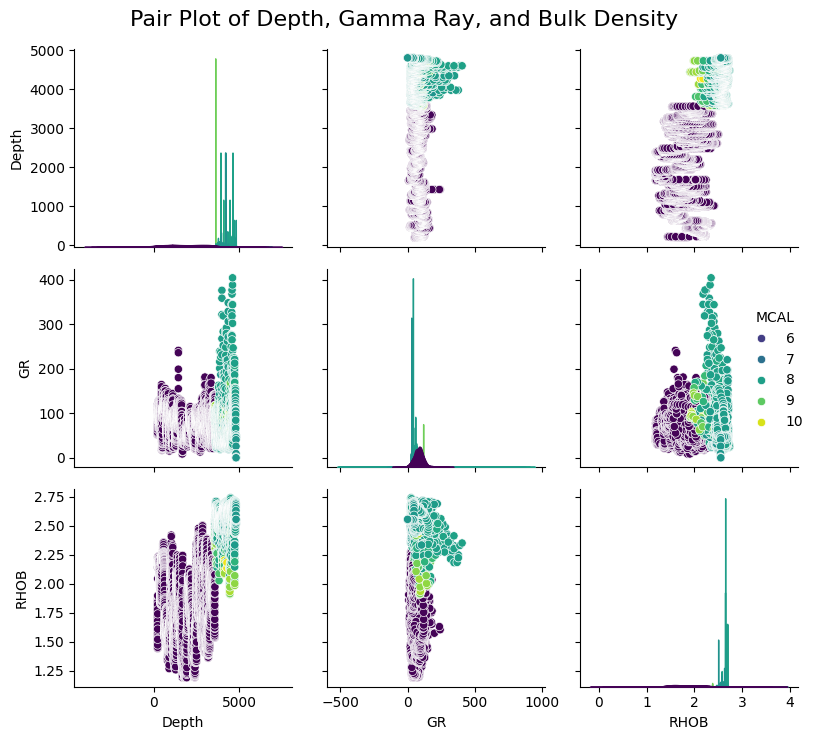

In [101]:
# Figure 1:

# Create a pair plot for selected columns to show the relationship between Depth, Bulk Density, and Gamma Ray
sns.pairplot(
    original_data,
    vars=['Depth','GR','RHOB'],       # Data columns to include
    hue= 'MCAL',                      # Color the points by Caliper data
    palette='viridis'                 # Specify color palette
)

# Add title
plt.suptitle('Pair Plot of Depth, Gamma Ray, and Bulk Density', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [102]:
# Check the minimum and maximum of MCAL

print(original_data['MCAL'].min())
print(original_data['MCAL'].max())

5.0474
10.3086


Above, I double-checked the minimum and maximum values for the Caliper log (MCAL), which gives me the same values as in the described function (5 to 10). So, I will edit Figure 1 (since the MCAL data starts from 6 in this figure) and normalize the MCAL data so it can include values below 6.

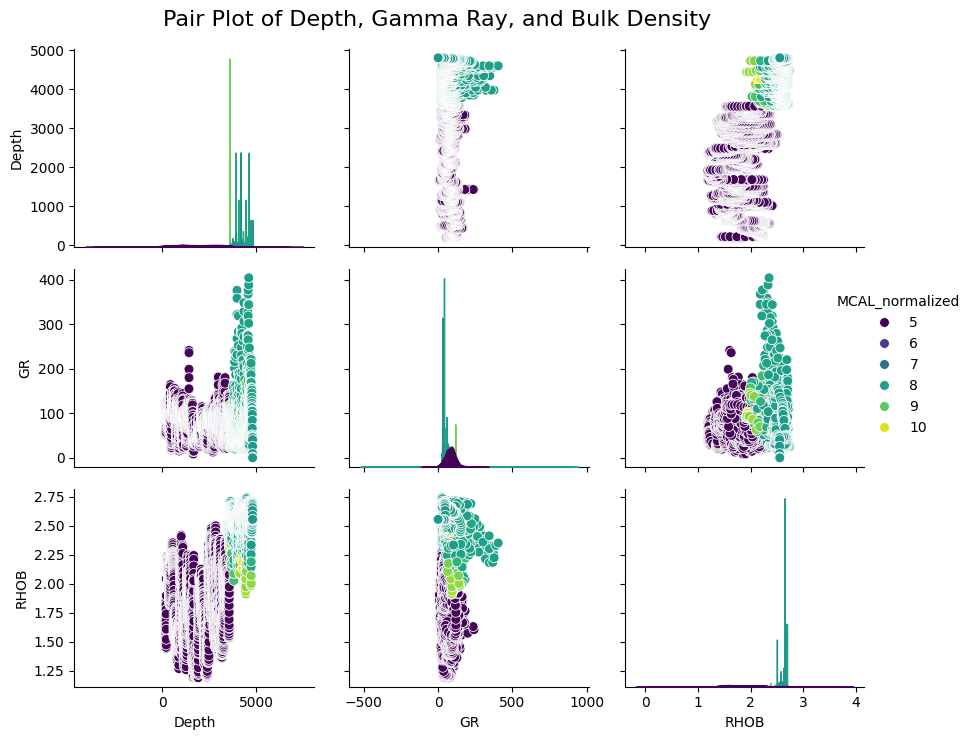

In [103]:
# Figure 1 Edited:

# I will normalize MCAL values to start from 5, since without normalization, the color scale starts at 6, while the data starts at 5 and the mean value is 5.9

# Normalize MCAL to start from 5
scaler = MinMaxScaler(feature_range=(5, original_data['MCAL'].max()))  # Scale between 5 and max MCAL value
original_data['MCAL_normalized'] = scaler.fit_transform(original_data[['MCAL']])

# Create the pair plot with hue set to MCAL_normalized
grid = sns.pairplot(
    original_data,
    vars=['Depth', 'GR', 'RHOB'],         # Data columns to include
    hue='MCAL_normalized',                # Use the normalized MCAL values for hue
    palette='viridis',                    # Specify the color palette
    plot_kws={'s': 50},                   # Adjust the size of the points
    height=2.5,                           # Adjust the size of each plot

)

# Add a title
plt.suptitle('Pair Plot of Depth, Gamma Ray, and Bulk Density', fontsize=16)

# Manually control the legend's position to move it more to the right
grid._legend.set_bbox_to_anchor((1.1, 0.5))

# Show the plot
plt.tight_layout()
plt.show()

**Figure 1 edited:**

The pair plot visualizes the relationships between three key variables in the dataset: Depth, Gamma Ray log (GR), and Bulk Density log (RHOB). These were chosen because they are commonly used to analyze subsurface geological properties. Depth helps us understand the vertical position of data points, GR provides information about the mineralogical composition of the formation (especially useful for identifying shaly versus clean formations), and RHOB helps assess the density of the formation, which is crucial for understanding porosity and lithology.

The plot is color-coded based on the normalized values of the caliper log (MCAL), which gives insight into the borehole size. This variable was included to see if discrepancies in borehole size could affect the readings of the other logs, particularly in relation to anomalies like washouts that may occur when the borehole diameter increases.

By combining these variables, the plot offers a way to visually assess how changes in depth, gamma ray readings, and bulk density are related, and to identify potential anomalies that may be caused by borehole irregularities.



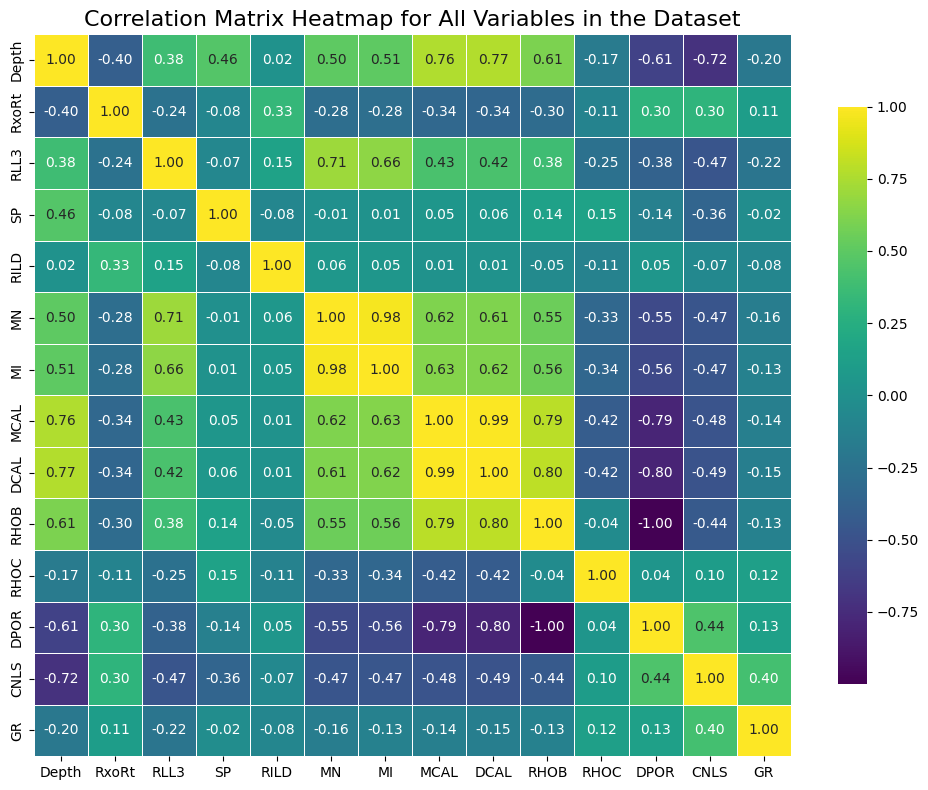

In [104]:
# Figure 2:

# Calculate the correlation matrix for the entire dataset but dropping the 'MCAL_normalized' column created in the previous step
correlation_matrix = original_data.drop(columns=['MCAL_normalized']).corr()  # Excluded MCAL_normalized

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,                # Annotate each cell with the numeric value
            cmap='viridis',            # Specify the Color palette
            fmt='.2f',                 # Format the numbers to two decimal places
            linewidths=0.5,            # Line width between the cells
            cbar_kws={'shrink': 0.8})  # Adjust color bar size

# Add a title
plt.title('Correlation Matrix Heatmap for All Variables in the Dataset', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

**Figure 2:**

The plot shows the correlation matrix heatmap for my entire dataset. We can see that there is a:

1- Strong positive correlations: Between Depth and MCAL (Normal caliper), and between MN (Resistivity wide array) and MI (Resistivity Intermediate Array).

2- Strong negative correlations: Between MCAL and DPOR (Density Porosity), and RHOB (Bulk Density) and DPOR.

3- Moderate correlations: Between variables such as DCAL (Differential Caliper)and RHOB, and RxoRt (Ratio of Shallow and deep resistivity in well) and RLL3 (Laterlog 3 data).

4- Weak or no correlations: Between variables like SP (spontaneous data) and GR, and RILD (Deep Induction resistivity data) and GR.


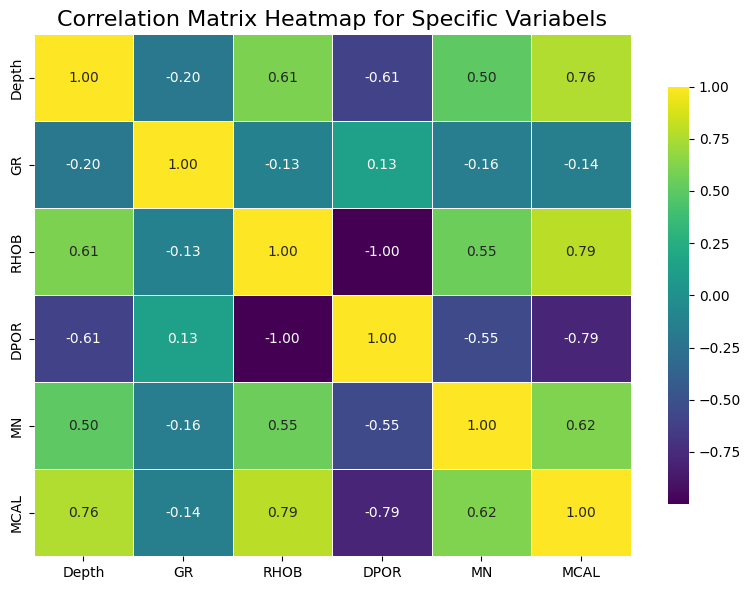

In [105]:
# Figure 3:

# Calculate the correlation matrix for specific variables
correlation_matrix = original_data[['Depth', 'GR', 'RHOB', 'DPOR', 'MN', 'MCAL']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.heatmap(correlation_matrix,
            annot=True,                 # Annotate each cell with the numeric value
            cmap='viridis',             # Specify the Color palette
            fmt='.2f',                  # Format the numbers to two decimal places
            linewidths=0.5,             # Line width between the cells
            cbar_kws={'shrink': 0.8})   # Adjust color bar size

# Add a title
plt.title('Correlation Matrix Heatmap for Specific Variabels', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


**Figure 3:**

The plot shows the correlation matrix heatmap for a selected set of variables, which include Depth, Gamma Ray (GR), Bulk Density (RHOB), Density Porosity (DPOR), Resistivity (MN), and Normal Caliper (MCAL). I decided to focus on these specific variables because they can tell us about the properties of the subsurface. I can see that there is a:

1-	Strong positive correlations between: Depth and MCAL (0.76), Depth and RHOB(0.61), MCAL and RHOB (0.79), and MCAL and MN (0.62).

2-	Strong negative correlations between: DPOR and RHOB (-1.00), DPOR and MCAL (-0.79), and Depth and DPOR (-0.61).

3-	Moderate positive correlation between: MN and RHOB (0.55).

4-	Moderate negative correlation between: MN and DPOR (-0.55).

5-	Weak correlations between: GR and all the other variables. GR and Depth (-0.20), GR and MCAL (-0.14), GR and RHOB (-0.13), GR and DPOR (0.13), and GR and MN (-0.14)

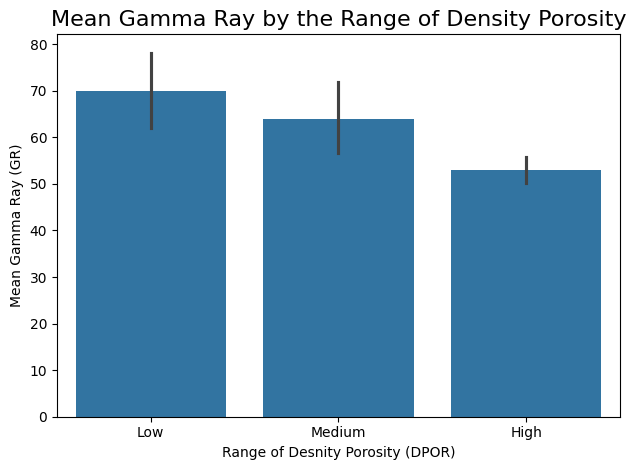

In [106]:
# Figure 4:

# Bar Plot

# Create new column to categorized DPOR into  low, medium, and high
# Adjust the bins based on the distribution of DPOR my data
original_data['DPOR_category'] = pd.cut(original_data['DPOR'], bins=[0, 1.5, 2, 3], labels=['Low', 'Medium', 'High'])

# Create a bar plot to compare the mean Gamma Ray (GR) across different DPOR categories
sns.barplot(x='DPOR_category', y='GR', data=original_data)

# Add title and labels
plt.title('Mean Gamma Ray by the Range of Density Porosity', fontsize=16)
plt.xlabel('Range of Desnity Porosity (DPOR)')
plt.ylabel('Mean Gamma Ray (GR)')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 4:**

This bar plot shows the mean Gamma Ray (GR) values for different ranges of Density Porosity (DPOR) categorized into Low, Medium, and High. The vertical lines extending from the tops of the bars represent the standard error of the mean for the mean GR values, showing the uncertainty around the mean estimate. I can see that there is an inverse relationship between Density Porosity, where higher DPOR values tend to have lower GR values, and lower DPOR values tend to have higher GR values. This makes sense since Lower GR can be an indication of reservoir which is known to have higher porosity.


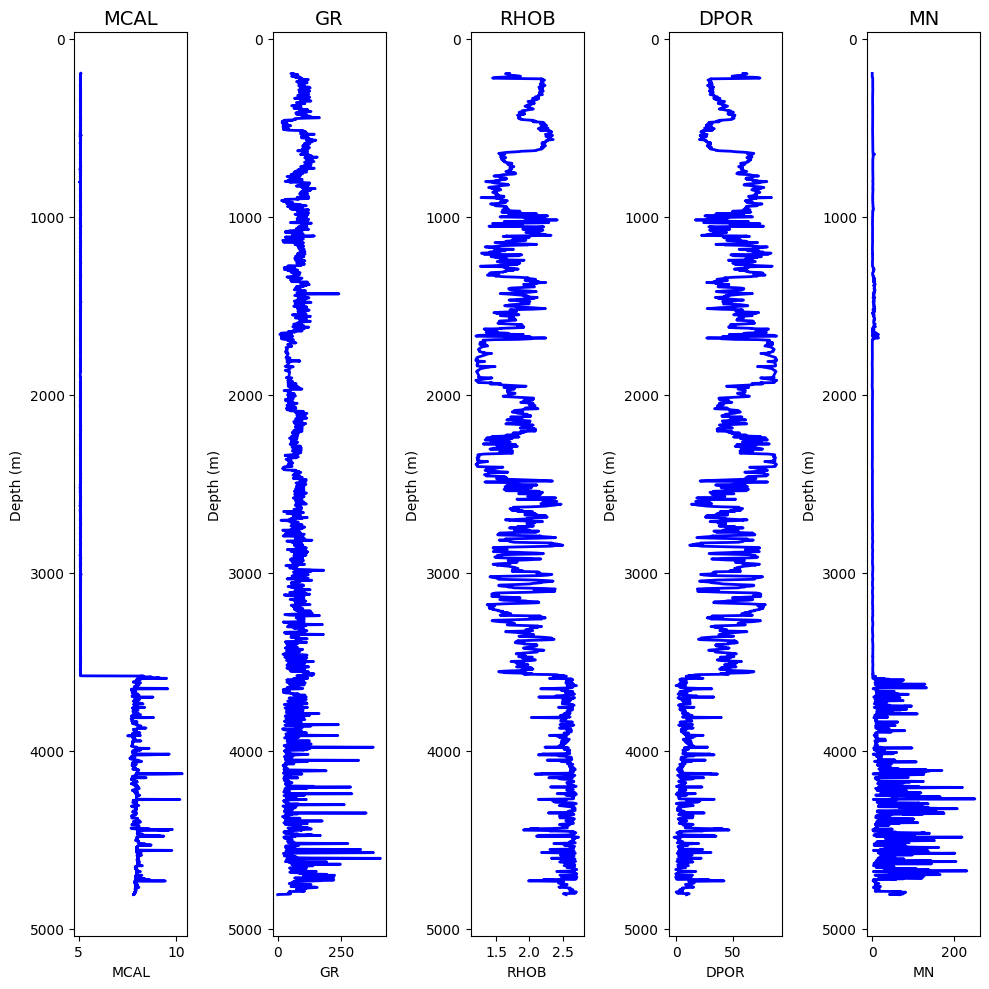

In [107]:
# Figure 5:

# Plotting the Logs

# Specify the well logs to plot
well_logs = ['MCAL', 'GR', 'RHOB', 'DPOR', 'MN']

# Create a figure with multiple subplots
fig, axes = plt.subplots(1,5, figsize=(10, 10))

# Iterate over each log and create a subplot
for i, log in enumerate(well_logs):
    axes[i].plot(original_data[log], original_data['Depth'], label=log, color='blue', linewidth=2)
    axes[i].invert_yaxis()  # Invert Y-axis for depth increasing downward
    axes[i].set_xlabel(log)
    axes[i].set_ylabel('Depth (m)')
    axes[i].set_title(f'{log}', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


**Figure 5:**

The figure above shows a visualization of the Normal Caliper log (MCAL), Gamma Ray log (GR), Bulk Density log (RHOB), Density Porosity log (DPOR), and Resistivity (MN) log in relation to depth.

MCAL (Caliper): The caliper log measures the borehole diameter, and significant variations in MCAL could indicate washouts or borehole instability, suggesting issues with borehole conditions.

GR (Gamma Ray): Higher GR values indicate more shale or clay-rich formations, while lower values suggest cleaner formations.

RHOB (Bulk Density): The variation in bulk density across depth can provide insights into lithology, with denser formations showing higher values and more porous formations showing lower values.

DPOR (Density Porosity): This log reflects the porosity of the rock, which can help identify the volume of void spaces in the formation. Higher porosity values are typical in more permeable formations.

MN (Resistivity): Resistivity indicates how well the formation resists electrical current, which can indicate fluid saturation. Typically, high resistivity values suggest hydrocarbon-bearing formations (resistive to current), while low resistivity indicates water-bearing zones (less resistive). Variations in resistivity with depth help distinguish between different types of fluid reservoirs in the subsurface.

At a depth of around 3500 meters, I noticed a sudden shift in the values. This could be due to several factors, like changes in lithology or fluids, but I think the issue might be the borehole condition. The caliper log (MCAL) drastically increased at that depth, which could indicate washouts or instability in the borehole conditions. This would reflect issues with the borehole rather than the formation itself, which could have caused the sudden change in the other log readings.



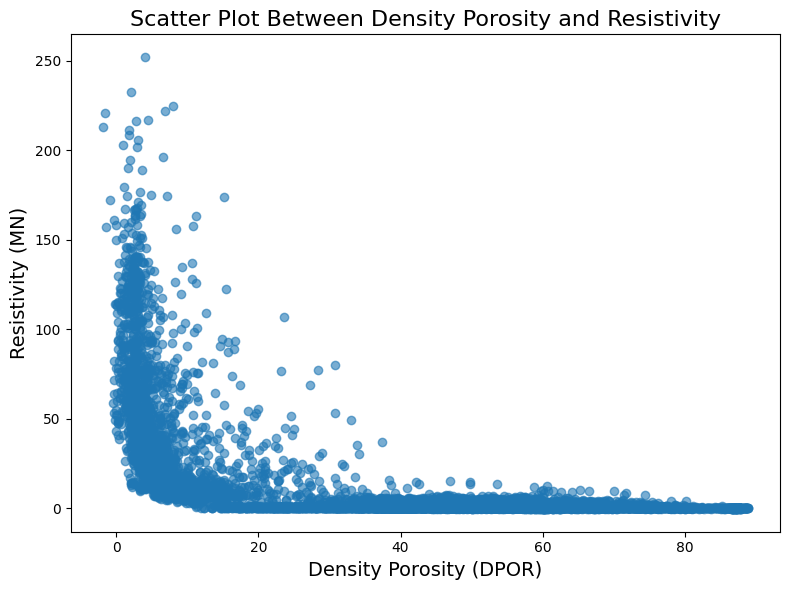

In [108]:
# Figure 6:

# Scatter plot between Desnity Porosity (DPOR) and Resistivity (MN)
plt.figure(figsize=(8, 6))

# Plot the scatter plot
plt.scatter(original_data['DPOR'], original_data['MN'], alpha=0.6)

# Add titles and labels
plt.title('Scatter Plot Between Density Porosity and Resistivity', fontsize=16)
plt.xlabel('Density Porosity (DPOR)', fontsize=14)
plt.ylabel('Resistivity (MN)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Figure 6:**

The scatter plot shows the relationship between Density Porosity (DPOR) and Resistivity (MN). The plot indicates that Resistivity decreases as the Density Porosity (DPOR) increases, with most data points clustering at lower DPOR values and showing higher Resistivity values. This suggests that higher porosity in the dataset may be associated with water-saturated formations, which is typically less desirable in terms of hydrocarbon potential.

## Section 3: Unsupervised Learning Methods

###Method 1: K means


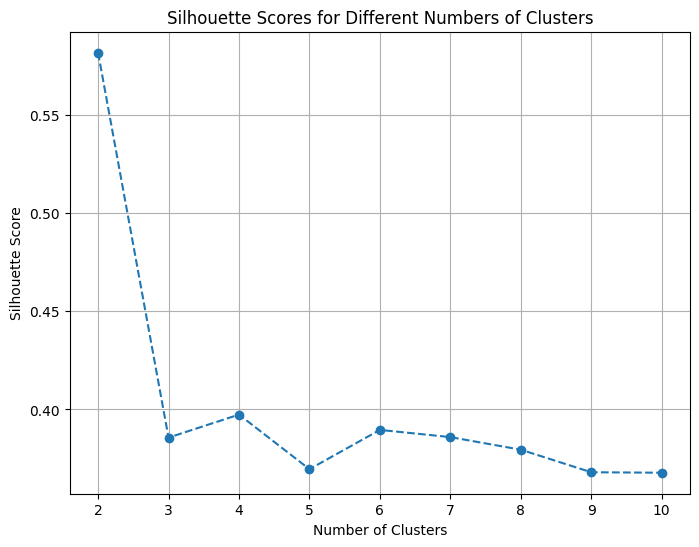

The optimal number of clusters based on Silhouette Score is: 2


In [117]:
# Figure 7:

# Before doing the KMeans cluster I want to determine the number of clusters to use


# Step 1: Prepare the data
data_for_clustering = standardized_data_df[['GR', 'RHOB', 'DPOR', 'MN']]

# Step 2: Calculate the Silhouette Scores for different numbers of clusters
silhouette_scores = []
range_of_clusters = range(2, 11)

for n_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(standardized_data_df)
    cluster_labels = kmeans.predict(standardized_data_df)
    score = silhouette_score(standardized_data_df, cluster_labels)
    silhouette_scores.append(score)

# Step 3: Plot the Silhouette Scores for each number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_of_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_of_clusters)
plt.grid(True)
plt.show()

# Step 4: Find the optimal number of clusters
optimal_clusters = range_of_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on Silhouette Score is: {optimal_clusters}")

# Step 5: Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_for_clustering)  # Fit the KMeans model on the selected data
cluster_labels = kmeans.labels_  # Get the cluster labels

# Step 6: Add the KMeans cluster labels to the standardized_data_df
standardized_data_df['KMeans_Cluster'] = cluster_labels

**Figure 7:**

This plot shows the Silhouette Scores for different numbers of clusters in the dataset. This helps me determine the optimal number of clusters for the KMeans clustering. The Silhouette Score decreases as I increase the number of clusters, especially for 3 clusters and beyond. This suggests that having more than 2 clusters does not improve the cohesiveness and separation of the data points. As such, based on the plot, the optimal number of clusters is 2, as it corresponds to the highest Silhouette Score (0.553). This means that clustering at 2 clusters is the most well-separated and cohesive.

In [118]:
# Check if the 'KMeans_Cluster' column has been added to the standardized dataframe
standardized_data_df.head()

,GR,RHOB,DPOR,MN,MCAL,KMeans_Cluster
0,-0.487081,-0.809121,0.809096,-0.438317,-0.610783,0
1,-0.673394,-0.852904,0.852952,-0.438575,-0.615302,0
2,-0.737046,-0.902461,0.902468,-0.438753,-0.627482,0
3,-0.708394,-0.938546,0.938656,-0.438553,-0.626792,0
4,-0.649281,-0.949371,0.949484,-0.438393,-0.619822,0


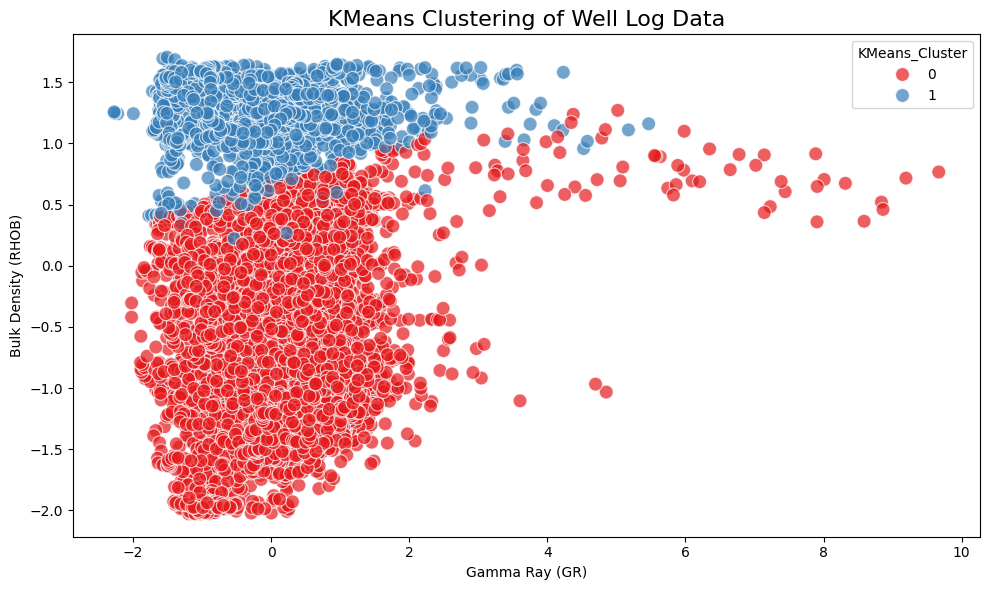

In [119]:
# Figure 8:

# Step 1: Apply KMeans with the optimal number of clusters (found from the previous code)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(standardized_data_df[['GR', 'RHOB', 'DPOR', 'MN']])  # Apply KMeans on selected columns from the standardized DataFrame

# Step 2: Visualize the KMeans clusters (e.g., using GR and RHOB)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GR', y='RHOB', hue='KMeans_Cluster', data=standardized_data_df, palette='Set1', s=100, alpha=0.7)

# Add titles and labels
plt.title('KMeans Clustering of Well Log Data', fontsize=16)
plt.xlabel('Gamma Ray (GR)')
plt.ylabel('Bulk Density (RHOB)')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 8:**

The plot shows the KMeans clustering results of the well log data, specifically Gamma Ray (GR) vs Bulk Density (RHOB). The data points are colored based on the KMeans cluster they belong to, with two clusters indicated (0,1).

Cluster 0 (Red): Represents a group with lower Gamma Ray (GR) values and more spread out but relatively low Bulk Density (RHOB). It indicates a cleaner, less consolidated formation. This combination suggests a formation with lower mineral content, potentially indicating more porous rocks, which could have higher porosity and permeability.

Cluster 1 (Blue): Represetns a group of lower Gamma Ray (GR) values, and higher Bulk Density (RHOB) values, often suggesting a more compact, non-shaly formation, potentially with lower porosity.

Additionally, the data points moving towards the right on the x-axis (Gamma Ray increasing) could indicate areas where there is a shift in the mineral content. These shifts might reflect a transition from cleaner formations to more mineral-rich (shaly) zones, potentially affecting the porosity and permeability characteristics of the formation.



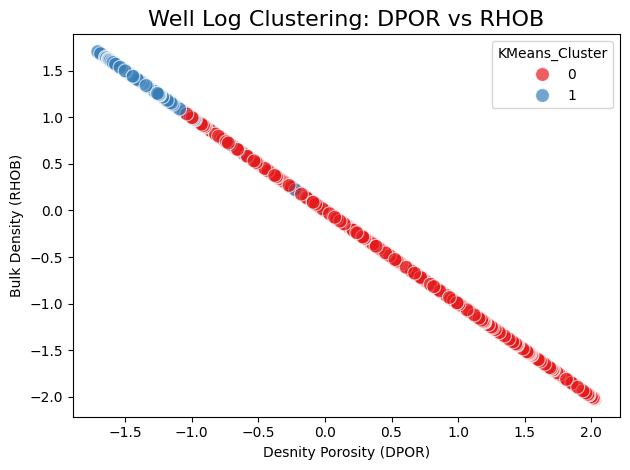

In [120]:
# Figure 9:

# Visualize clusters with different well log combinations from the standardized DataFrame

# Use the cluster column to color the data points by their assigned cluster
sns.scatterplot(x=standardized_data_df['DPOR'], y=standardized_data_df['RHOB'], hue=standardized_data_df['KMeans_Cluster'], palette='Set1', s=100, alpha=0.7)

# Add labels and title
plt.title('Well Log Clustering: DPOR vs RHOB', fontsize=16)
plt.xlabel('Desnity Porosity (DPOR)')
plt.ylabel('Bulk Density (RHOB)')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 9:**

The scatter plot shows the relationship between Density Porosity (DPOR) and Bulk Density (RHOB). The DPOR and RHOB values are inversely related, which is common because as porosity increases (more void space), the bulk density typically decreases. This trend is typically observed in the geological context because less dense materials tend to have higher porosity. The plot shows how these two parameters vary across the different clusters, potentially indicating different lithologies or geological zones in the subsurface.


Cluster 0 (Red): These points have a low Bulk Density (RHOB) that continues to decrease and high Density Porosity (DPOR). This suggests that the Red points represent geological formations that are porous and unconsolidated such as a soft rock, where there is less mineral content.

Cluster 1 (Blue): These points have a much higher Bulk Density (RHOB) and very low Density Porosity (DPOR). This suggests formations that are denser and more consolidated. It could be compact rock formations with fewer pores, possibly tight sandstone, where the density is high due to the minerals, but the porosity is low.

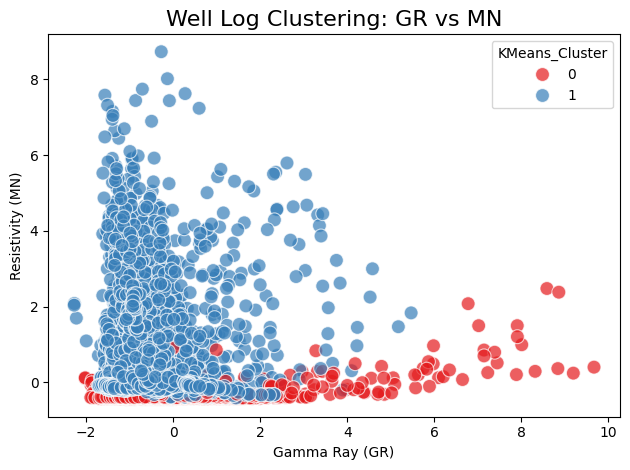

In [122]:
# Figure 10:

# Visualize clusters with different well log combinations from the standardized DataFrame

# Use the cluster column to color the data points by their assigned cluster
sns.scatterplot(x=standardized_data_df['GR'], y=standardized_data_df['MN'], hue=standardized_data_df['KMeans_Cluster'], palette='Set1', s=100, alpha=0.7)

# Add labels and title
plt.title('Well Log Clustering: GR vs MN', fontsize=16)
plt.xlabel('Gamma Ray (GR)')
plt.ylabel('Resistivity (MN)')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 10:**

This scatter plot shows the relationship between Gamma Ray (GR) and Resistivity (MN), with the points color-coded based on the KMeans clusters (Cluster 0 and Cluster 1).

Cluster 0 (Red points): These points have relatively low resistivity values, and low to high Gamma Ray (GR) values. This suggests that these formations are more likely to be conductive, possibly indicating shaly or water-saturated formations, which typically have lower resistivity values. The range of Gamma Ray values suggests some variability in the mineral content, but overall, these formations tend to be more porous or less consolidated.

Cluster 1 (Blue points): These points have low Gamma Ray (GR) values and increasing Resistivity (MN) values. This indicates that these formations are less conductive, likely non-shaly with lower porosity, such as more consolidated formations. The increase in resistivity suggests the presence of hydrocarbons or other non-conductive materials, like gas, in the rock, where the formation is more compact.

In [123]:
# Silhouette Score for KMeans

# Get the cluster labels from KMean
kmeans_labels = kmeans.labels_

# Calculate the Silhouette Score
sil_score_kmeans = silhouette_score(standardized_data_df, kmeans_labels)

print(f"Silhouette Score for KMeans: {sil_score_kmeans}")

Silhouette Score for KMeans: 0.5589083371201277


### Method 2: PCA

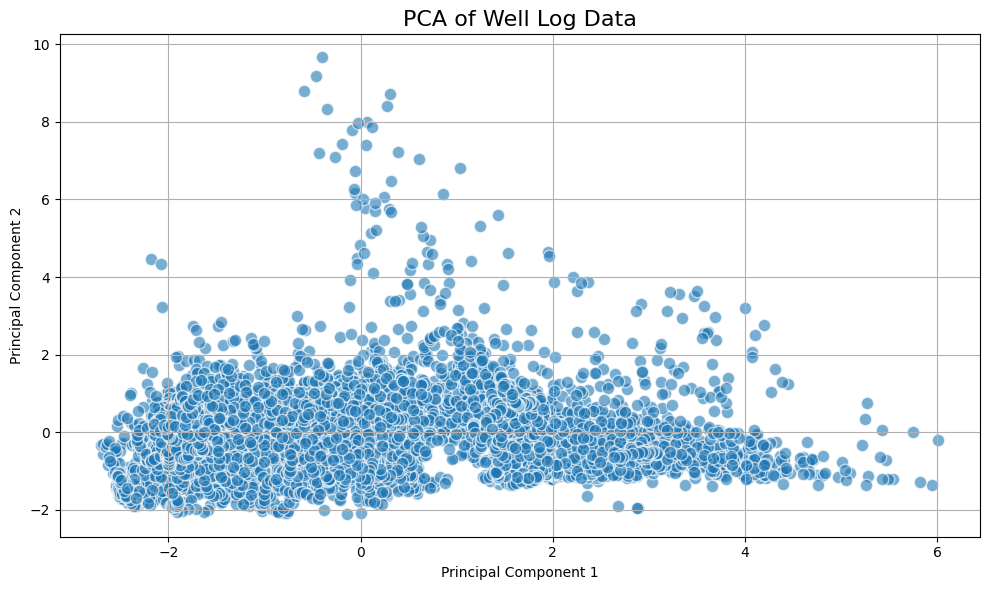

Explained variance ratio by component: [0.61696001 0.24235241]
Total explained variance: 0.8593124172249665


In [124]:
# Figure 11:

# Step 1: Select the columns for PCA from the standardized DataFrame
data_for_pca = standardized_data_df[['GR', 'RHOB', 'DPOR', 'MN']]

# Step 2: Apply PCA and reduce to 2 components for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca)

# Step 3: Add the PCA results directly to the standardized DataFrame
standardized_data_df['PCA1'] = pca_result[:, 0]
standardized_data_df['PCA2'] = pca_result[:, 1]

# Step 4: Visualize the PCA results by plotting the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(standardized_data_df['PCA1'], standardized_data_df['PCA2'], alpha=0.6, edgecolors='w', s=80)

# Add title and labels
plt.title('PCA of Well Log Data', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print the explained variance ratio for each principal component
print(f'Explained variance ratio by component: {pca.explained_variance_ratio_}')
print(f'Total explained variance: {sum(pca.explained_variance_ratio_)}')

**Figure 11:**

This plot represents a 2D view of the result of Principal Component Analysis (PCA) applied to my well log data, specifically the first two principal components, Principal Component 1 and Principal Component 2. The data is spread along PCA1, which represents the direction of maximum variance in my dataset showing some significant clustering or variation. While along PCA2, there is also variation, though it's smaller in comparison to PCA1, which is typical because PCA1 captures the most significant variation.
The points are scattered, but there seems to be a dense grouping near the center and some spread as you move outward along both axes.

To score the PCA, I used the explained variance ratios, which show that PCA1 captures 61.7% of the variance, and PCA2 captures 24.2%. This means that together, these two components explain 85.93% of the total variance in the dataset. As such, I am reducing the data's dimensionality efficiently without losing much important information.

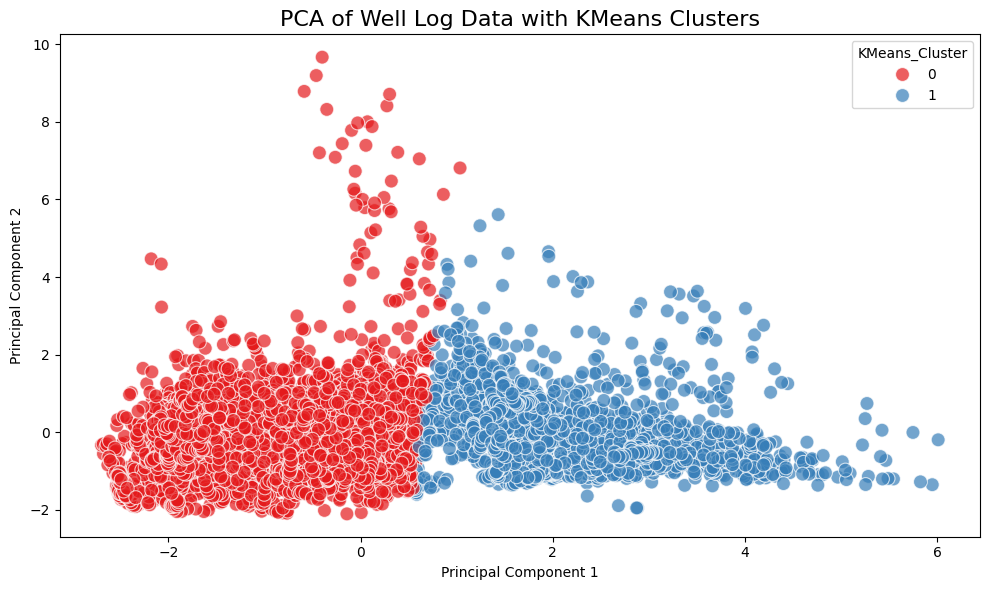

In [125]:
 # Figure 12:

# Applying PCA to the dataset colored with KMean cluster


# Step 1: Select the columns for PCA from the standardized DataFrame
data_for_pca = standardized_data_df[['GR', 'RHOB', 'DPOR', 'MN']]

# Step 2: Apply PCA and reduce to 2 components for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca)

# Step 3: Visualize the PCA results, color-coded by KMeans clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=standardized_data_df, palette='Set1', s=100, alpha=0.7)

# Add titles and labels
plt.title('PCA of Well Log Data with KMeans Clusters', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

# Show the plot
plt.show()

**Figure 12:**

This plot also represents a 2D view of the result of Principal Component Analysis (PCA) applied to my well log data, but this time with KMeans cluster labels applied, with the points colored according to their cluster labels.
The clustering suggests that the two clusters exhibit different patterns across the principal components, with relatively little overlap, which suggests that the clustering was effective in distinguishing different data patterns. This might correspond to different types of geological features or well log behaviors.



In [129]:
# I want to see the loadings for PCA1 and PCA2 to see what they are most influenced by

# Get the loadings for each principal component
loadings = pca.components_

# Display the loadings for PCA1 and PCA2 directly
print("PCA1 Loadings: ")
for i, feature in enumerate(data_for_pca.columns):
    print(f"{feature}: {loadings[0, i]}")

print("\nPCA2 Loadings: ")
for i, feature in enumerate(data_for_pca.columns):
    print(f"{feature}: {loadings[1, i]}")

PCA1 Loadings: 
GR: -0.15811669145401483
RHOB: 0.6106593928909063
DPOR: -0.6106592825768413
MN: 0.4787373584341251

PCA2 Loadings: 
GR: 0.9788263936012291
RHOB: 0.14206708708482718
DPOR: -0.1420681532673766
MN: -0.03914682342209576


PCA1 is most heavily influenced by Bulk Density (RHOB) and Density Porosity (DPOR), with both variables having strong loadings around 0.6 and -0.6, respectively. While PCA2 is strongly influenced by Gamma Ray (GR), with the highest loading (0.9) among the four features. The other features contribute much less to PCA2


### Method 3: DB Scan

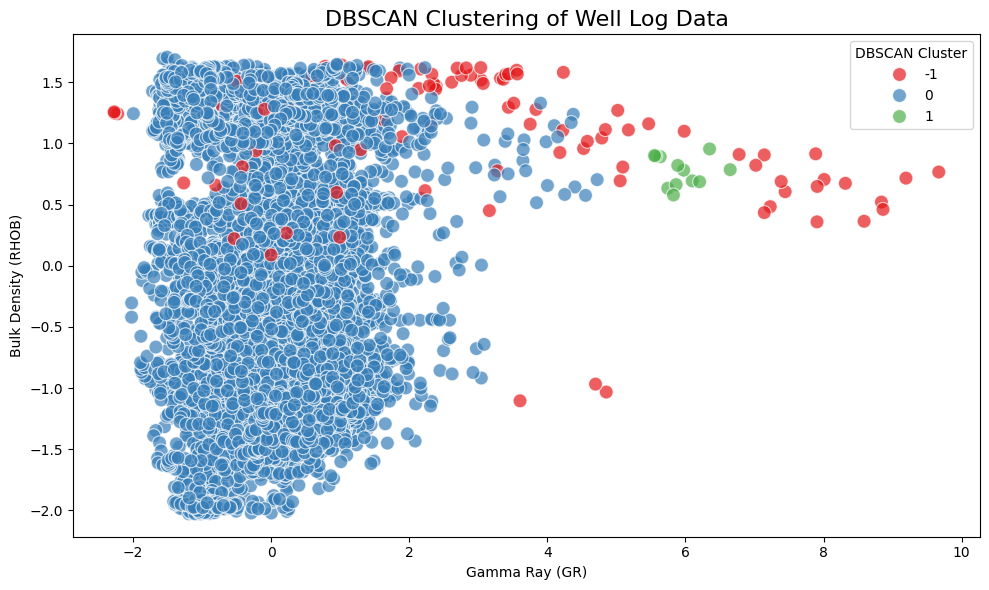

In [130]:
# Figure 13:

# Step 1: Select the columns for DBSCAN from the standardized DataFrame
data_for_dbscan = standardized_data_df[['GR', 'RHOB', 'DPOR', 'MN']]

# Step 2: Apply DBSCAN for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_for_dbscan)

# Step 3: Add the DBSCAN cluster labels to the DataFrame
standardized_data_df['DBSCAN_Cluster'] = dbscan_clusters

# Step 4: Visualize the DBSCAN results
plt.figure(figsize=(10, 6))

# Plot the data with different clusters
sns.scatterplot(x='GR', y='RHOB', hue='DBSCAN_Cluster', palette='Set1', data=standardized_data_df, s=100, alpha=0.7, edgecolor='w')

# Add title and labels
plt.title('DBSCAN Clustering of Well Log Data', fontsize=16)
plt.xlabel('Gamma Ray (GR)')
plt.ylabel('Bulk Density (RHOB)')
plt.legend(title='DBSCAN Cluster')

# Show the plot
plt.tight_layout()
plt.show()

**Figure 13:**

The plot shows the results of DBSCAN clustering applied to the well log data. The points are colored based on their assigned DBSCAN cluster.
The blue and green points represent two distinct regions in the data with different characteristics. While the red points represent noise or outliers that DBSCAN couldn't associate with the primary clusters.

Red Points (Cluster -1): These points are considered noise or outliers by DBSCAN, meaning they do not fit into any of the main clusters. These could represent unusual data points, potentially corresponding to anomalies, measurement errors, or rare geological features.

Blue Points (Cluster 0): These points represent a dense cluster that may have a consistent relationship between Gamma Ray and Bulk Density. This cluster likely represents a geological formation with consistent properties, possibly corresponding to a type of rock or material that is relatively homogeneous in terms of porosity and mineral content.

Green Points (Cluster 1): This cluster indicates another distinct group with a different relationship between Gamma Ray and Bulk Density compared to the blue cluster. These points could represent a different formation type with distinct characteristics, such as a denser or more consolidated geological formation since the Gamma Ray values are much higher than the Blue points.

In [128]:
# Silhouette Score for DBSCAN

# Get the labels from the DBSCAN model
dbscan_labels = dbscan.labels_

# Calculate the silhouette score
sil_score = silhouette_score(standardized_data_df, dbscan_labels)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.5544641321663006


##Conclusion:

This project utilized three unsupervised clustering techniques, KMeans, DBSCAN, and PCA, to analyze well log data, with a focus on geological properties such as Gamma Ray (GR), Bulk Density (RHOB), Resistivity (MN), and Density Porosity (DPOR). The data was standardized before clustering, ensuring that each feature was on a comparable scale. Silhouette scoring was employed to determine the optimal number of clusters, with results indicating that two clusters were most appropriate.

The results align with geological expectations, where different clusters often correspond to distinct rock types and their associated petrophysical properties. KMeans and DBSCAN revealed distinct clusters corresponding to different geological formations, highlighting porous, unconsolidated formations and other denser, more consolidated rocks. DBSCAN further identified outliers, potentially signifying anomalous or less well-defined geological zones. PCA helped reduce the dimensionality of the data, offering a simplified view of the relationships between variables and highlighting the most influential factors in the clustering process.

The findings confirm that well log data is a powerful tool for distinguishing between various geological formations based on their petrophysical properties. The results provide insights into the distribution of rock types, potentially aiding in resource exploration and geological assessments. Some anomalies in the clusters indicated areas where the properties of the formations were less clearly defined, requiring further investigation. The overall results demonstrate the effectiveness of machine learning methods in uncovering hidden patterns within subsurface data. This project highlights the potential for these techniques to enhance our understanding of subsurface formations and offers opportunities for future work, such as refining these clustering techniques, incorporating additional geological features, or exploring alternative models for a more comprehensive analysis.


##Questions:

**Quetions 1: Which method did you like the most?**

 The method I liked the most is PCA (Principal Component Analysis) with KMeans Clustering because it reduced the dimensionality of the data, making it easier to visualize. After performing PCA, I could see how the data is grouped in a 2D space. KMeans clustering helped to segment the data into distinct groups.

**Question 2: Which method did you like the least?**

The method I liked the least is DBSCAN. The challenges with DBSCAN are that the algorithm might not always form clusters with the same characteristics, and it labels some points as noise (label -1) where it might not be. Also, playing with the parameters of DBSCAN was confusing.

**Question 3: How did you score these unsupervised models?**

To evaluate the clustering performance, I used the Silhouette Score for both KMeans and DBSCAN. The Silhouette Score provides an indication of how well the data points are clustered, with higher scores reflecting better/defined clusters. For both KMeans and DBSCAN, the scores were around 0.5, suggesting that the clustering was somewhat meaningful, but there is still room for improvement, especially with DBSCAN, where some data points were considered noise (-1).

For the PCA (Principal Component Analysis) method, I assessed the model using the explained variance ratios of the principal components. The first principal component explained 61.7% of the variance, while the second explained 24.2%. Together, these components captured about 85.9% of the total variance in the data, indicating that the PCA transformation was effective in reducing dimensionality while retaining most of the important information.

**Question 4: Did the output align with your geologic understanding?**

Yes, the outputs from the various unsupervised learning methods align well with my geological understanding. The clustering results, particularly from KMeans and DBSCAN, effectively highlight the geological formations based on their distinct properties, such as Gamma Ray (GR), Bulk Density (RHOB), Density Porosity (DPOR), and Resistivity (MN) values. While KMeans grouped the data into distinct clusters, DBSCAN also helped identify outliers or unusual data points.

These clustering results reinforce the concept that well log data can be used to differentiate between various geological formations. They also provide a better understanding of the underlying subsurface structure, identifying which formations are clean, porous, and potentially hydrocarbon-rich and which are shaly or dense. These insights are valuable for geological analysis, resource exploration, and environmental assessments.

**Question 5: What did you want to learn more about?**


I would like to dive deeper into the methods I used to understand how they differ from one another, as they produced relatively similar results. I'm also interested in exploring other clustering techniques and see if they fit better with the dataset. Additionally, I would like to learn how to fine-tune parameters, especially for DBSCAN. Moreover, I want to explore whether the similarity in results is due to the nature of the dataset, user error, or if these methods naturally produce similar outputs.

**Question 6: Did you pre-process your data?**

Yes, before starting with the unsupervised learning methods, I did some initial data cleaning to pre-process the data. Then, I performed standardization of the data. Standardization ensures that each feature contributes equally to the analysis, which is important since PCA and DBSAN are especially sensitive to the scale of the features.

**Question 7: What was a decision you were most unsure about?**

First, I was unsure about which methods to use that would be more suitable for the dataset. Then, I was unsure about the choice of the number of clusters in KMeans, so I used Silhouette scores to determine the optimal number of clusters. Still, the results could vary depending on the dataset's characteristics. DBSCAN, on the other hand, required careful tuning of the eps (epsilon) and min_samples parameters to ensure meaningful clustering. The uncertainty around setting these hyperparameters might have impacted the results.


